<a href="https://colab.research.google.com/github/luca-arts/seeingtheimperceptible/blob/main/notebooks/skinRetouching/tests/retouchML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Face Smoothing Detection and Beautification


https://github.com/ju-leon/RetouchML

1. First make sure you select **GPU** as runtime type under Runtime > Runtime Type


2. Linking next cloud

In [1]:
# we'll link the dataset from next-cloud
!curl https://raw.githubusercontent.com/luca-arts/seeingtheimperceptible/main/notebooks/database_mod.py -o /content/database_mod.py

from database_mod import *

link_nextcloud()

nextcloud = '/content/database/'

#input_folder, output_folder = create_io(database=nextcloud,topic='skinRetouching',library='retouchML')
input_folder, output_folder = create_io(database=nextcloud,topic='skinRetouching/retouchML',library='retouchML')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2235  100  2235    0     0   5518      0 --:--:-- --:--:-- --:--:--  5504
what's the username for nextcloud? colab
what's the password for user colab? ··········
0
Please enter the username to authenticate with server
https://cloud.bxlab.net/remote.php/dav/files/colab/colabfiles/ or hit enter for none.
  Username: Please enter the password to authenticate user colab with server
https://cloud.bxlab.net/remote.php/dav/files/colab/colabfiles/ or hit enter for none.
  Password:  
content of /etc/fstab: https://cloud.bxlab.net/remote.php/dav/files/colab/colabfiles/ /content/database davfs user,rw,auto 0 0


3. Clone Git repository

In [2]:
import os
root_path = '/content/retouchML'
# clone the repository
if not os.path.exists('retouchML'):
  !git clone https://github.com/ju-leon/RetouchML {root_path}

Cloning into '/content/retouchML'...
remote: Enumerating objects: 290, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 290 (delta 53), reused 84 (delta 24), pack-reused 168
Receiving objects: 100% (290/290), 79.65 MiB | 13.34 MiB/s, done.
Resolving deltas: 100% (116/116), done.


4. Installing a smart progress bar

In [3]:
# Instantly make your loops show a smart progress meter - just wrap any iterable with tqdm(iterable), and you're done!
# means "progress" in Arabic (taqadum, تقدّم) and is an abbreviation for "I love you so much" in Spanish (te quiero demasiado).

#!pip install --force tqdm==4.24.0
#!pip install --force tqdm==4.63.0
!pip install tqdm

5. Tensorflow version check

In [4]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


6. Getting started

creating different folders:
- aligned_images
- raw_images == input_folder
- alignement_vector
- out == output_folder

In [5]:
%cd {root_path}

# make folders
!mkdir aligned_images alignement_vector

%ls

/content/retouchML
 adaptive.py            encoder/                     README.md*
 aligned_images/        ffhq_dataset/                registry.py
 alignement_vector/     fit_faces.py                 robust_loss/
 align_images.py*      'Hand Labeler.ipynb'          run_generator.py*
'Beautify ALAE.ipynb'   launcher.py                  run_metrics.py*
 Beautify.ipynb         Learn_Attractiveness.ipynb   run_projector.py*
 custom_adam.py         LICENSE.txt*                 run_training.py*
 dataloader.py          lreq.py                      scheduler.py
 dataset_tool.py*       metrics/                     swa.py
 defaults.py            model.py                     test_nvcc.cu*
 dnnlib/                net.py                       tracker.py
 Dockerfile*           'Predict Beauty.ipynb'        train_alae.py
 docs/                  pretrained_networks.py*      training/
 encode_images.py*      projector.py*                utils.py


7. Define the input folder


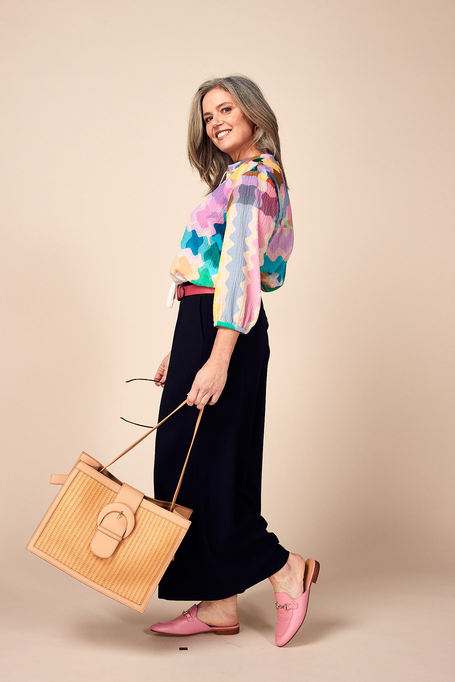

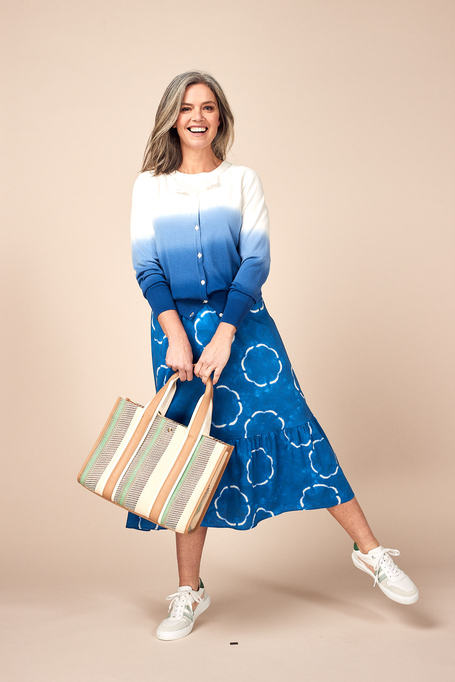

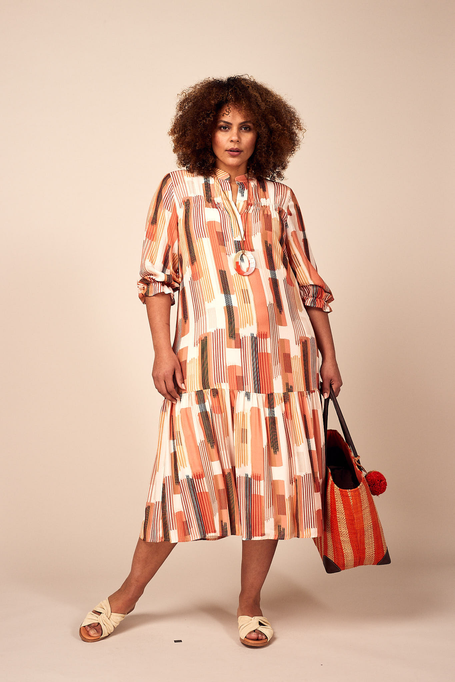

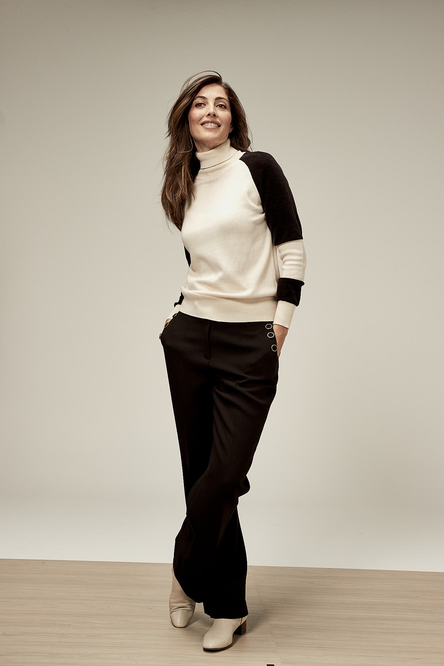

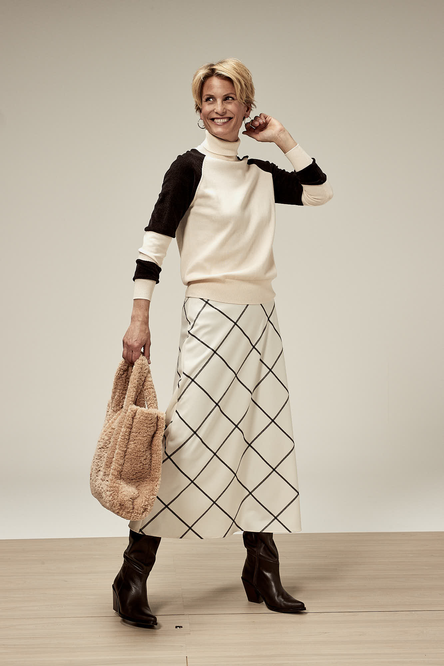

In [6]:
import glob, os
import PIL.Image

#path = "raw_images/"
in_path = input_folder + '/'

# define which images extensions are valid
valid_images = (".jpg",".png")

for f in os.listdir(in_path):
    if f.endswith(valid_images):
        img = PIL.Image.open(in_path + f)
        display(img.resize((int(img.size[0]/3), int(img.size[1]/3)), PIL.Image.LANCZOS))


8. Aligning images

Run the following scripts to crop and see the results.

In [7]:
!python align_images.py {in_path} aligned_images/ alignement_vector/

Using TensorFlow backend.
64045056/64040097 [==============================] - 5s 0us/step


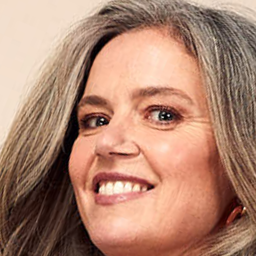

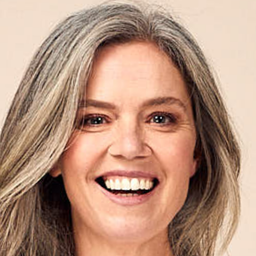

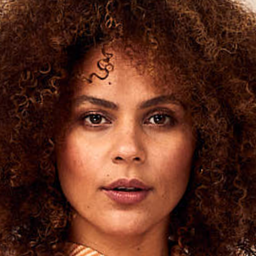

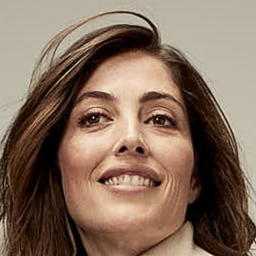

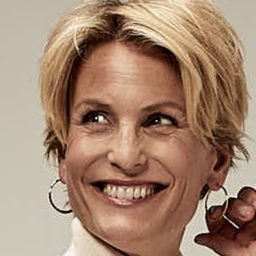

In [8]:
align_path = 'aligned_images/'

# images are last -> first, sorting them from first -> last
for f in sorted(os.listdir(align_path)):
    if f.endswith(valid_images):
        img = PIL.Image.open(align_path + f)
        display(img.resize((256,256), PIL.Image.LANCZOS))

9. Encoding

We need to translate what we can see into a latent vector.
We will use a StyleGan encoder.

This will take a while, so sit back and let Googles GPU do their jobs...

In [9]:
!python encode_images.py --help

Using TensorFlow backend.
usage: encode_images.py [-h] [--data_dir DATA_DIR] [--mask_dir MASK_DIR]
                        [--load_last LOAD_LAST] [--dlatent_avg DLATENT_AVG]
                        [--model_url MODEL_URL] [--model_res MODEL_RES]
                        [--batch_size BATCH_SIZE] [--optimizer OPTIMIZER]
                        [--vgg_url VGG_URL] [--image_size IMAGE_SIZE]
                        [--resnet_image_size RESNET_IMAGE_SIZE] [--lr LR]
                        [--decay_rate DECAY_RATE] [--iterations ITERATIONS]
                        [--decay_steps DECAY_STEPS]
                        [--early_stopping [EARLY_STOPPING]]
                        [--early_stopping_threshold EARLY_STOPPING_THRESHOLD]
                        [--early_stopping_patience EARLY_STOPPING_PATIENCE]
                        [--load_effnet LOAD_EFFNET]
                        [--load_resnet LOAD_RESNET]
                        [--use_preprocess_input [USE_PREPROCESS_INPUT]]
                 

In [10]:
!python encode_images.py aligned_images/ generated_images/ latent_representations/ \
    --vgg_url=https://rolux.org/media/stylegan/vgg16_zhang_perceptual.pkl \
    --lr=0.4 --iterations=200 \
    --use_best_loss=True --early_stopping=True --load_resnet=True 

Using TensorFlow backend.
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Compiling... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Compiling... Loading... Done.
58892288/58889256 [==============================] - 8s 0us/step
  0% 0/5 [00:00<?, ?it/s]Rects:
rectangles[[(46, 81) (201, 236)]]
Saving mask masks/LB_0022_01.png
Loading mask masks/LB_0022_01.png

  0% 0/200 [00:00<?, ?it/s]
  0% 0/5 [00:09<?, ?it/s]
Traceback (most recent call last):
  File "encode_images.py", line 243, in <module>
    main()
  File "encode_images.py", line 177, in main
    for loss_dict in pbar:
  File "/usr/local/lib/python3.7/dist-packages/tqdm/std.py", line 1195, in __iter__
    for obj in iterable:
  File "/content/retouchML/encoder/perceptual_model.py", line 303, in optimize
    min_op = optimizer.minimize(self.loss, var_list=[vars_to_optimize])
  File "/tensorflow-1.15.2/python3.7/tensorflow_core/contrib/optimizer_v2/optimizer_v2.py", line 724, in

10. Result

The following image is the encoded image in latent space.

It should look pretty similar to the original representation, although it might vary slightly.


If you're not happy with the result try running the encoding again with different parameters.

In [ ]:
path = "generated_images/"
for f in os.listdir(path):
    if f.endswith(valid_images):
        img = PIL.Image.open(path + f)
        display(img.resize((256,256), PIL.Image.LANCZOS))

In [ ]:
import keras
model = keras.models.load_model('/content/drive/My Drive/RetouchML/models/no_pca.keras')

In [ ]:
import math
import pickle
import PIL.Image
import numpy as np
#import config
import dnnlib
import dnnlib.tflib as tflib
from encoder.generator_model import Generator
URL_FFHQ = 'https://d36zk2xti64re0.cloudfront.net/stylegan2/networks/stylegan2-ffhq-config-f.pkl'
tflib.init_tf()
with dnnlib.util.open_url(URL_FFHQ, cache_dir="cache") as f:
    generator_network, discriminator_network, Gs_network = pickle.load(f)

generator = Generator(Gs_network, batch_size=1, randomize_noise=False)

model_res = 1024
model_scale = int(2*(math.log(model_res,2)-1))

def generate_raw_image(latent_vector):
    latent_vector = latent_vector.reshape((1, model_scale, 512))
    generator.set_dlatents(latent_vector)
    return generator.generate_images()[0]

def generate_image(latent_vector):
    img_array = generate_raw_image(latent_vector)
    img = PIL.Image.fromarray(img_array, 'RGB')
    return img

Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.


#### Computing the gradient

In order to improve the face, we'll follow the gradient.
This should give us a better version of the image that is still close to the original image.

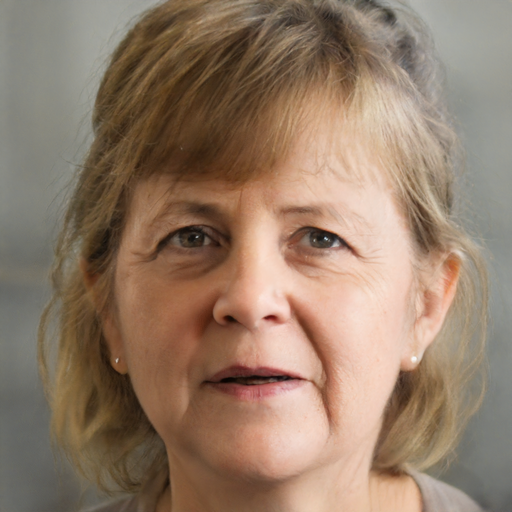

671.4436
688.71594


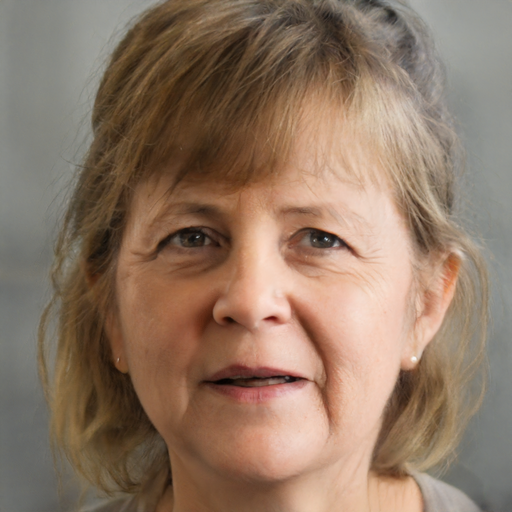

695.2519


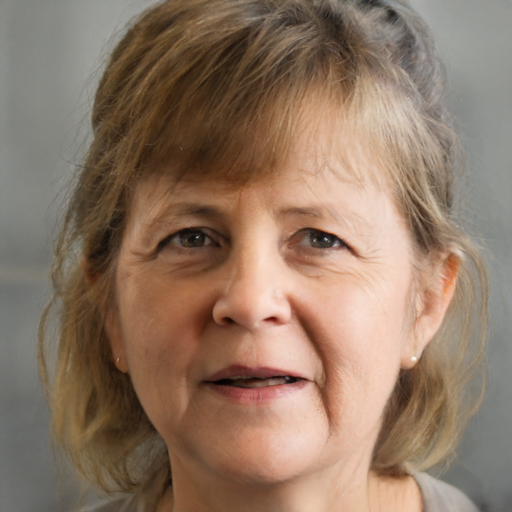

[704.6617  679.7334  694.22723 682.7472  716.3377  682.3791  700.8811
 711.13074 646.53827 740.26965 701.3336  681.9397  686.43243 702.4813
 695.4938  694.32544 697.2798  696.3429 ]


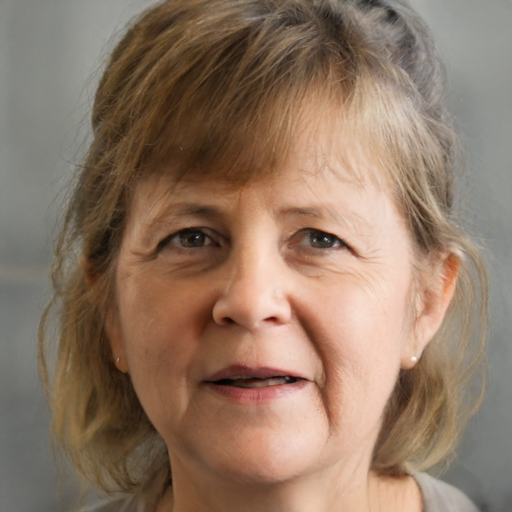

In [ ]:
import copy
from tqdm import tqdm

latent_vector = np.load('/content/drive/My Drive/RetouchML/latent_representations/merkel_01.npy')
img = generate_image(latent_vector)
display(img.resize((512,512),PIL.Image.LANCZOS))

predictions = model.predict(latent_vector).reshape(-1)
print(np.mean(predictions))


for x in range(2):
  x_tensor = tf.convert_to_tensor(latent_vector, dtype=tf.float32)

  with tf.GradientTape() as t:
      t.watch(x_tensor)
      output = model(x_tensor)

  gradients = tf.gradients(output, x_tensor)

  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    result_output=np.array(sess.run(gradients)).reshape(18,512)

  latent_vector += result_output
  print(np.mean(model.predict(latent_vector)))
  img = generate_image(latent_vector)
  display(img.resize((512,512),PIL.Image.LANCZOS))

predictions = model.predict(latent_vector).reshape(-1)
print(predictions)

img = generate_image(latent_vector)
display(img.resize((512,512),PIL.Image.LANCZOS))
img.save("generated_images/merkel_01.png", "PNG")

In [ ]:
#/content/RetouchML/masks/IMG_20200209_150540_01.png
#/content/drive/My Drive/RetouchML/raw_images/pexels-anna-shvets-4672292.jpg
#/content/drive/My Drive/RetouchML/raw_images/pexels-sound-on-3756989.jpg
img_name = "merkel.jpg"
raw_path = "raw_images/" + img_name
out_path = "out/" + img_name
face_path = "generated_images/" 
mask_path = "masks/"
vector_path = "alignement_vector/"
!python fit_faces.py $raw_path $face_path $mask_path $vector_path $out_path


Using TensorFlow backend.
Done!


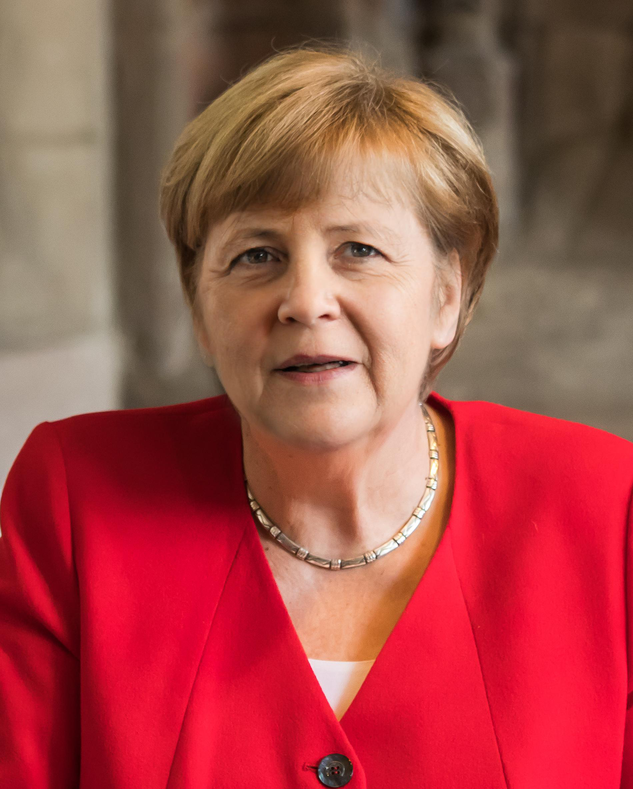

In [ ]:
path = "out/"
valid_images = (".jpg",".png")
for f in os.listdir(path):
    if f.endswith(valid_images):
        img = PIL.Image.open(path + f)
        display(img.resize((int(img.size[0]/3), int(img.size[1]/3)), PIL.Image.LANCZOS))


#### Done

And that's it. The difference is subtle but in direct comaprison with the original images, you can clearly see the changes.